# Ejercicios de precipitación

__Índice__<br>

__[Ejercicio 2 - Curvas de doble masa](#Ejercicio-2---Curvas-de-doble-masa)__<br>

## <font color=steelblue>Ejercicio 2 - Curvas de doble masa<br>

<font color=steelblue>La tabla *MassCurve* en el archivo *RainfallData.xlsx* proporciona la precipitación anual medida durante 17 años en cinco estaciones pluviométricas de una región. La ubicación de la estación C cambió en el año 1974. Realiza un análisis mediante una curva de doble masa para verificar la consistencia en la información del pluviómetro y realiza los ajustes pertinentes para corregir las inconsistencias descubiertas.</font>

Una **curva de doble masa** es un gráfico de datos acumulado de una serie de datos de una variable frente a la serie de datos acumulados de otra variable en el mismo periodo de medición. Habitualmente, la variable de comparación es la serie acumulada de la media de las observaciones en otras estaciones.
    
<img src="img/Double mass curve.JPG" alt="Mountain View" style="width:450px">
> <font color=grey>Curva de doble masa de datos de precipitación. *(Double-Mass Curves. USGS, 1960)*<\font><br>
    
La serie de una estación es correcta si la curva de doble masa es una línea recta; la pendiente de dicha recta es la constante de proporcionalidad entre las series. Un cambio de pendiente en la recta significa un cambio en la constante de proporcionalidad y que la serie antes o después de ese punto debe ser corregida.

La curva de doble masa, cuando se aplica a precipitación, toma la forma $Y=bX$, donde $b$ es la pendiente. No hay ordenada en el origen.

In [77]:
# Importar los datos de la hoja 'Data' en '2MassCurve.xls'
data2 = pd.read_excel('RainfallData.xlsx', sheet_name='2MassCurve',
                      skiprows=4,
             index_col=0, usecols=range(6))
data2.head()

,A,B,C,D,E
Year,,,,,
1970,1010,1161,780,949,1135
1971,1005,978,1041,784,970
1972,1067,1226,1027,1067,1158
1973,1051,880,825,1014,1022
1974,801,1146,933,923,821


In [78]:
# Calcular la media anual entre todas las estaciones
data2['AVG'] = data2.mean(axis=1)
data2.head()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010,1161,780,949,1135,1007.0
1971,1005,978,1041,784,970,955.6
1972,1067,1226,1027,1067,1158,1109.0
1973,1051,880,825,1014,1022,958.4
1974,801,1146,933,923,821,924.8


Primeramente, creamos un gráfico de dispersión que compare la serie de precipitación anual en el pluviómetro C frente a la media de todas las estaciones. La gráfica muestra también la regresión lineal entre las dos series según la fórmula $Y=bX$.

In [79]:
def linear_reg(x, b):
    """Linear regression with no intecept
    
    y = b * x   
    
    Input:
    ------
    x:         float. Independet value
    b:         float. Slope of the linear regression
    
    Output:
    -------
    y:         float. Regressed value"""
    
    y = b * x
    return y

In [81]:
# Ajustar la regresión lineal
b = curve_fit(linear_reg, data2.AVG, data2.C)[0][0]
b

0.944138390867605

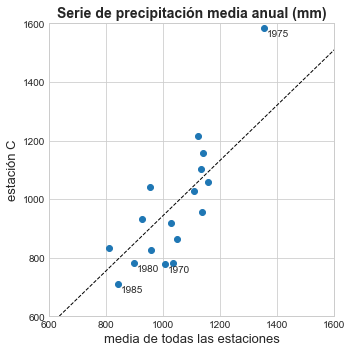

In [82]:
fig, ax = plt.subplots(figsize=(5,5))

# configuración
ax.set_title('Serie de precipitación media anual (mm)', fontsize=14,
             fontweight='bold')
ax.set_xlabel('media de todas las estaciones', fontsize=13)
ax.set_ylabel('estación C', fontsize=13)
ax.set(xlim=(600, 1600), ylim=(600, 1600))

# diagrama de dispersión
ax.scatter(data2.AVG, data2.C)

# recta de regresión
ax.plot([0, 3000], [0, b * 3000], 'k--', linewidth=1)

# label one every five years
years = data2.index[::5]
xyear = [data2.loc[year, 'AVG'] + 10 for year in years]
yyear = [data2.loc[year, 'C'] - 20 for year in years] 
for i, year in enumerate(years):
    ax.text(xyear[i], yyear[i], year, verticalalignment='center')

plt.tight_layout()

Este tipo de gráfico tiene mucha dispersión causada por la variabilidad anual del clima, por lo que no es conveniente para encontrar anomalías. 

Por eso se utiliza la **curva de doble masa**. Esta gráfica se crea a partir de las series de **precipitación acumulada**. De esta manera, la gráfica ha de tener siempre una pendiente positiva y continua; cualquier cambio de pendiente representa una anomalía en la serie de precipitación.

In [83]:
# Serie anual de precipitación acumulada
accData2 = data2.cumsum()
accData2.head()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010.0,1161.0,780.0,949.0,1135.0,1007.0
1971,2015.0,2139.0,1821.0,1733.0,2105.0,1962.6
1972,3082.0,3365.0,2848.0,2800.0,3263.0,3071.6
1973,4133.0,4245.0,3673.0,3814.0,4285.0,4030.0
1974,4934.0,5391.0,4606.0,4737.0,5106.0,4954.8


In [85]:
# ajustar la regresión lineal
b = curve_fit(linear_reg, accData2.AVG, accData2.C)[0][0]
b

0.9472720120775414

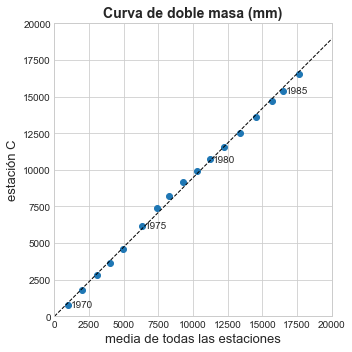

In [86]:
fig, ax = plt.subplots(figsize=(5,5))
lim = 20000
thr = 0.1

# configuración
ax.set_title('Curva de doble masa (mm)', fontsize=14, fontweight='bold')
ax.set_xlabel('media de todas las estaciones', fontsize=13)
ax.set_ylabel('estación C', fontsize=13)
ax.set(xlim=(0, lim), ylim=(0, lim))

# diagrama de dispersión
ax.scatter(accData2.AVG, accData2.C, label='original')

# regresión lineal
ax.plot([0, lim], [0, b * lim], 'k--', linewidth=1)

# etiquetar uno de cada cinco años
years = accData2.index[::5]
xyear = [accData2.loc[year, 'AVG'] + 200 for year in years]
yyear = [accData2.loc[year, 'C'] for year in years] 
for i, year in enumerate(years):
    ax.text(xyear[i], yyear[i], year, verticalalignment='center')
          
plt.tight_layout()

In [87]:
# identificar años con anomalía
for j, year in enumerate(accData2.index[4:-4]):
    # pendiente de la recta de regresión hasta 'year'
    p1 = np.polyfit(accData2.loc[:year, 'AVG'],
                    accData2.loc[:year, 'C'], 1)
    # pendiente de la recta de regresión a partir de 'year'
    p2 = np.polyfit(accData2.loc[year + 1:, 'AVG'],
                    accData2.loc[year + 1:, 'C'], 1)
    # identificar como anomalía si el cociente de las pendientes se aleja de 1
    if (p1[0] / p2[0] < 1 - thr) | (p1[0] / p2[0] > 1 + thr):
        print("Potential anomaly: year {0}".format(year))

Potential anomaly: year 1975
Potential anomaly: year 1976
Potential anomaly: year 1977
Potential anomaly: year 1978
Potential anomaly: year 1979


El análisis muestra un cambio en la pendiente a partir de 1976, lo que concuerda con el hecho de que la estación cambió de ubicación en 1974. Puesto que no disponemos de información para decidir si la serie correcta es la anterior o posterior a 1976, corregiremos los datos previos a dicha fecha.

In [88]:
# año de la anomalía
year = 1976

In [89]:
# pendiente antes de la anomalía
# ------------------------------
b_wrong = curve_fit(linear_reg, accData2.loc[:year, 'AVG'],
                    accData2.loc[:year, 'C'])[0][0]
b_wrong

0.9648376054834307

In [90]:
# pendiente después de la anomalía
# --------------------------------
# extraer datos posteriores a la anomalía
temp = data2.loc[year + 1:, :].copy()
# calcular serie acumulada
accTemp = temp.cumsum(axis=0)    
# ajustar la regresión
b_right = curve_fit(linear_reg, accTemp.AVG, accTemp.C)[0][0]
b_right

0.8836253396178155

In [91]:
# corregir datos originales
# -------------------------
# crear columna para los datos corregidos
data2['C_c'] = data2.C
# corregir datos
data2.loc[:year, 'C_c'] = data2.loc[:year, 'C'] * b_right / b_wrong
# recalcular la serie acumulada
accData2 = data2.cumsum(axis=0)

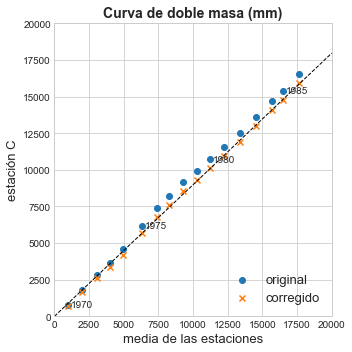

In [92]:
# GRÁFICO CON LA SERIE ORIGINAL Y LA CORREGIDA
# --------------------------------------------
fig, ax = plt.subplots(figsize=(5,5))
lim = 20000

# configuración
ax.set_title('Curva de doble masa (mm)', fontsize=14, fontweight='bold')
ax.set_xlabel('media de las estaciones', fontsize=13)
ax.set_ylabel('estación C', fontsize=13)
ax.set(xlim=(0, lim), ylim=(0, lim))

# diagramas de dispersión
ax.scatter(accData2.AVG, accData2.C, label='original')
ax.scatter(accData2.AVG, accData2.C_c, marker='x', label='corregido')

# regresión linal
b = curve_fit(linear_reg, accData2.AVG, accData2.C_c)[0][0]
ax.plot([0, lim], [0, b * lim], 'k--', linewidth=1)

# etiquetas uno de cada cinco años
years = accData2.index[::5]
xyear = [accData2.loc[year, 'AVG'] + 200 for year in years]
yyear = [accData2.loc[year, 'C'] for year in years] 
for i, year in enumerate(years):
    ax.text(xyear[i], yyear[i], year, verticalalignment='center')

ax.legend(loc=4, ncol=1, fontsize=13)
plt.tight_layout()

## <font color=steelblue>Ejercicio 3 - Curvas de doble masa<br>

<font color=steelblue>Realiza un análisis mediante la curva de doble masa con los datos proporcionados en la tabla *Exercise_003* del archivo *RainfallData.xlsx*.</font>

In [93]:
# Importar los datos
data3 = pd.read_excel('RainfallData.xlsx', sheet_name='Exercise_003',
                      skiprows=0, index_col=0)

# Calcular la media anual entre todas las estaciones
data3['AVG'] = data3.mean(axis=1)

# Serie de precipitación acumulada
accData3 = data3.cumsum()

data3.head()

,A,B,C,D,E,AVG
Year,,,,,,
1926,39.75,45.70,30.69,37.36,32.85,37.270
1927,39.57,38.52,40.99,30.87,28.08,35.606
1928,42.01,48.26,40.44,42.00,33.51,41.244
1929,41.39,34.64,32.49,39.92,29.58,35.604
1930,31.55,45.13,36.72,36.32,23.76,34.696


Estación A

Estación B
Potencial anomalía: año 1930
Potencial anomalía: año 1931
Potencial anomalía: año 1935
Potencial anomalía: año 1936
Potencial anomalía: año 1937
Potencial anomalía: año 1938

Estación C

Estación D

Estación E
Potencial anomalía: año 1930
Potencial anomalía: año 1931
Potencial anomalía: año 1932
Potencial anomalía: año 1933
Potencial anomalía: año 1934



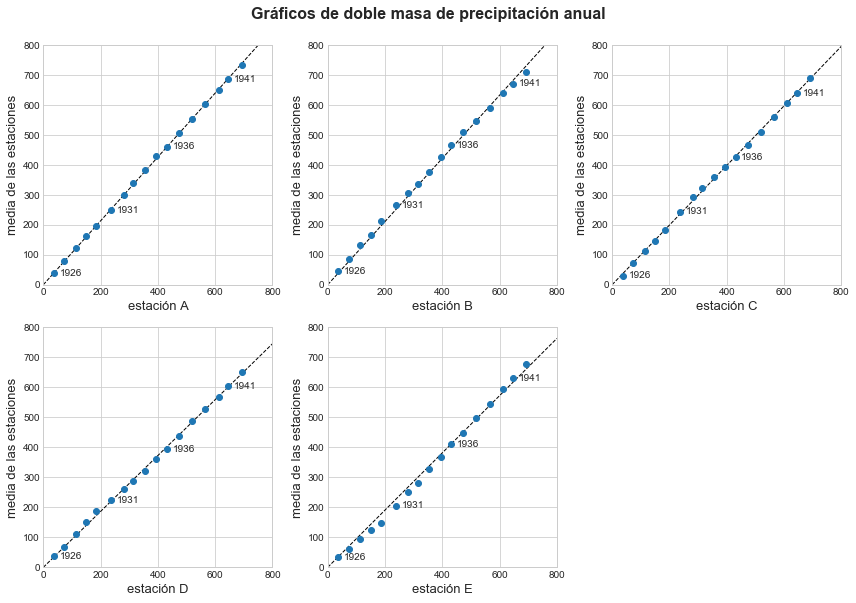

In [98]:
fig, ax = plt.subplots(2, 3, figsize=(12,8))
fig.text(0.5, 1.02, 'Gráficos de doble masa de precipitación anual', 
         horizontalalignment='center', fontsize=16, weight='bold')
ax[1, 2].axis("off")
lim = 800
thr = 0.1 # umbral para definir anomalías

for idx, gage in enumerate(["A", "B", "C", "D", "E"]):
    print('Estación', gage)
    # Definir la posición del gráfico
    (ii, jj) = np.unravel_index(idx, (2, 3))
    # Configurar
    ax[ii, jj].set(xlim=(0, lim), ylim=(0, lim))
    ax[ii, jj].set_xlabel('estación ' + gage, fontsize=13)
    ax[ii, jj].set_ylabel('media de las estaciones', fontsize=13)
    
    # Recta de pendiente 1
    b = curve_fit(linear_reg, accData3.AVG, accData3[gage])[0][0]
    ax[ii, jj].plot([0, lim], [0, b * lim], 'k--', linewidth=1)
    
    # Gráfico de dispersión
    ax[ii, jj].plot(accData3.AVG, accData3[gage], 'o')
    
    # label one every five years
    years = accData3.index[::5]
    xyear = [accData3.loc[year, 'AVG'] + 20 for year in years]
    yyear = [accData3.loc[year, gage] for year in years] 
    for i, year in enumerate(years):
        ax[ii, jj].text(xyear[i], yyear[i], year,
                        verticalalignment='center')
                        
    # identificar estaciones y años con anomalía
    for j, year in enumerate(accData3.index[4:-4]):
        # pendiente de la regresión lineal hasta j
        p1 = np.polyfit(accData3.loc[:year, 'AVG'],
                        accData3.loc[:year, gage], 1)
        # pendiente de la regresión linean desde j+1
        p2 = np.polyfit(accData3.loc[year + 1:, 'AVG'],
                        accData3.loc[year + 1:, gage], 1)
        # hay anomalía si el cambio de la pendiente es notable
        if (p1[0] / p2[0] < 1 - thr) | (p1[0] / p2[0] > 1 + thr):
            print("Potencial anomalía: año {0}".format(year))
    print()
    
plt.tight_layout()

Dos pluviómetros muestran inconsistencias: el pluviómetro B dos cambios de pendiente en 1930 y 1935,  y el pluviómetro E en el año 1930.

**Corregir pluviómetro B**

In [99]:
# pendiente antes de 1930
# -----------------------
b1 = curve_fit(linear_reg, accData3.loc[:1930, 'AVG'],
               accData3.loc[:1930, 'B'])[0][0]
b1

1.1440964837032106

In [100]:
# pendiente de 1931 a 1935
# ------------------------
temp = data3.loc[1931:1935, :]
accTemp = temp.cumsum(axis=0)
b2 = curve_fit(linear_reg, accTemp.loc[:, 'AVG'],
               accTemp.loc[:, 'B'])[0][0]
del temp, accTemp
b2

0.9842422849741361

In [102]:
# pendiente a partir de 1936
# --------------------------
temp = data3.loc[1936:, :]
accTemp = temp.cumsum(axis=0)
b3 = curve_fit(linear_reg, accTemp.loc[:, 'AVG'],
               accTemp.loc[1:, 'B'])[0][0]
del temp, accTemp
b3

0.9722932050016689

Puesto que la pendiente en el segundo y tercer periodo es similar, asumimos que el periodo incorrecto es hasta 1930.

In [104]:
# pendiente desde 1931
# --------------------
temp = data3.loc[1931:, :]
accTemp = temp.cumsum(axis=0)
b_ok = curve_fit(linear_reg, accTemp.loc[:, 'AVG'],
                 accTemp.loc[:, 'B'])[0][0]
del temp, accTemp
b_ok

0.9937661079160598

In [105]:
# corregir la serie hasta 1930
# ----------------------------
data3['B_c'] = data3.B.copy()
data3.loc[:1930, 'B_c'] = data3.loc[:1930, 'B'] * b_ok / b1
# accumulate corrected data
accData3 = data3.cumsum(axis=0)

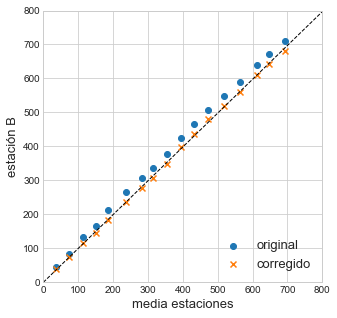

In [106]:
# Gráfico serie corregida vs original
# -----------------------------------
fig, ax = plt.subplots(figsize=(5,5))
# setup
ax.set(xlim=(0, lim), ylim=(0, lim))
ax.set_xlabel('media estaciones', fontsize=13)
ax.set_ylabel('estación B', fontsize=13)

b = curve_fit(linear_reg, accData3.AVG, accData3.B_c)[0][0]
ax.plot([0, lim], [0, b * lim], '--k', linewidth=1)

ax.scatter(accData3.AVG, accData3.B, label='original')
ax.scatter(accData3.AVG, accData3.B_c, marker='x', label='corregido')

ax.legend(loc=4, fontsize=13);

**Corregir estación E**<br>
Asumimos que la serie correcta es a partir de 1931 en adelante.

In [107]:
# pendiente hasta 1930
# --------------------
b_wrong = curve_fit(linear_reg, accData3.loc[:1930, 'AVG'],
                    accData3.loc[:1930, 'E'])[0][0]
b_wrong

0.8176415003641067

In [109]:
# pendiente desde 1931
# --------------------
temp = data3.loc[1931:, :]     # extract raw data
accTemp = temp.cumsum(axis=0) # accumulate series
b_ok = curve_fit(linear_reg, accTemp.AVG, accTemp.E)[0][0]
del temp, accTemp
b_ok

1.0478300389771686

In [110]:
# corregir series hasta 1930
# --------------------------
data3['E_c'] = data3.E
data3.loc[:1930, 'E_c'] = data3.loc[:1930, 'E'] * b_ok / b_wrong
# accumulate corrected data
accData3 = data3.cumsum(axis=0)

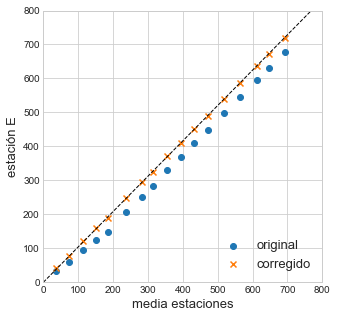

In [111]:
# Plot corrected vs original values
# ---------------------------------
fig, ax = plt.subplots(figsize=(5,5))
# setup
ax.set(xlim=(0, lim), ylim=(0, lim))
ax.set_xlabel('media estaciones', fontsize=13)
ax.set_ylabel('estación E', fontsize=13)

b = curve_fit(linear_reg, accData3.AVG, accData3.E_c)[0][0]
ax.plot([0, lim], [0, b * lim], '--k', linewidth=1)

ax.scatter(accData3.AVG, accData3.E, label='original')
ax.scatter(accData3.AVG, accData3.E_c, marker='x', label='corregido')

ax.legend(loc=4, fontsize=13);

## <font color=steelblue>Ejercicio 4 - Método hipsométrico

<font color=steelblue>Dada la curva hipsométrica de una cuenca (relación área-elevación) y la información de varias estaciones pluviométricas en dicha cuenca (tabla *Exercise_004* del archivo *RainfallData.xlsx*), calcula la precipitación media anual para la cuenca usando el método hipsométrico.<tfont>

| **Rango de altitud (m)** | **Fracción del área de la cuenca** |
|-------------------------|-----------------------------------|
| 311-400                 | 0.028                             |
| 400-600                 | 0.159                             |
| 600-800                 | 0.341                             |
| 800-1000                | 0.271                             |
| 1000-1200               | 0.151                             |
| 1200-1400               | 0.042                             |
| 1400-1600               | 0.008                             |

__Curva hipsométrica__<br>
La curva hipsométrica define el porcentaje de área de la cuenca que está por debajo de una altitud dada.

En este ejercicio utilizaremos la curva hipsométrica para asignar la proporción de la cuenca (en tanto por uno) correspondiente a cada franja de altitud.

In [112]:
# Rangos de altitud
Zs = np.array([311, 400, 600, 800, 1000, 1200, 1400, 1600])
Zs = np.mean([Zs[:-1], Zs[1:]], axis=0)
# Área asociada
As = np.array([0.028, 0.159, 0.341, 0.271, 0.151, 0.042, 0.008])

In [113]:
# crear data frame
hipso = pd.DataFrame(data=[Zs, As]).transpose()
hipso.columns = ['Z', 'A']
hipso['Aac'] = hipso.A.cumsum()
hipso

,Z,A,Aac
0,355.5,0.028,0.028
1,500.0,0.159,0.187
2,700.0,0.341,0.528
3,900.0,0.271,0.799
4,1100.0,0.151,0.950
5,1300.0,0.042,0.992
6,1500.0,0.008,1.000


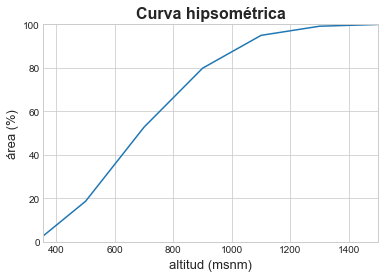

In [118]:
# Gráfico de la curva hipsométrica
plt.plot(hipso.Z, hipso.Aac * 100)
plt.title('Curva hipsométrica', fontsize=16, weight='bold')
plt.xlabel('altitud (msnm)', fontsize=13)
plt.xlim(Zs[0], Zs[-1])
plt.ylabel('área (%)', fontsize=13)
plt.ylim((0, 100));

__Regresión precipitación-altitud__

Utilizaremos los datos de precipitación anual en las estaciones de la cuenca para establecer la regresión lineal de la precipitación con la altitud.

In [120]:
# Importar datos de precipitación
data4 = pd.read_excel('RainfallData.xlsx', sheet_name='Exercise_004',
                      index_col='Gage')
# Simplificar nombres de las variables
data4.columns = ['Z', 'P']
data4

,Z,P
Gage,,
1,442,1392
2,548,1246
3,736,1495
4,770,1698
5,852,1717
6,1031,1752


Se calcula la regresión lineal de la precipitación media anual con respecto a la altura.

$$P=a·Z+b$$

Donde $P$ es la precipitación media anual (mm) de un punto a cota $Z$ (msnm).

In [121]:
# ajustar la recta de regresión
(a, b) = np.polyfit(data4.Z, data4.P, deg=1)
print('P = {0:.3f} Z + {1:.3f}'.format(a,b))

P = 0.841 Z + 936.550


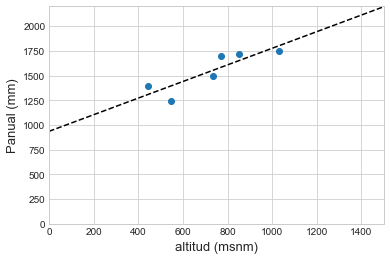

In [125]:
# Gráfico altitud vs precipitación anual
plt.scatter(data4.Z, data4.P)
# recta de regresión
xlim = np.array([0, Zs[-1]])
plt.plot(xlim, a * xlim + b, 'k--')
# configuración
plt.title('', fontsize=16, weight='bold')
plt.xlabel('altitud (msnm)', fontsize=13)
plt.xlim(xlim)
plt.ylabel('Panual (mm)', fontsize=13)
plt.ylim(0, 2200);

__Precipitación areal__

Conocida la regresión, se calcula la precipitación media anual en los puntos intermedios de cada una de los rangos de altitud que define la curva hipsométrica.

In [126]:
hipso['P'] = a * hipso.Z + b
hipso

,Z,A,Aac,P
0,355.5,0.028,0.028,1235.359775
1,500.0,0.159,0.187,1356.817066
2,700.0,0.341,0.528,1524.924043
3,900.0,0.271,0.799,1693.031019
4,1100.0,0.151,0.950,1861.137996
5,1300.0,0.042,0.992,2029.244973
6,1500.0,0.008,1.000,2197.351949


La precipitación areal es el sumatorio del producto del área y precipitación en cada uno de los rangos de altitud.

In [127]:
Pareal = np.sum(hipso.A * hipso.P)

print('La precipitación media anual sobre la cuenca es {0:.1f} mm'.format(Pareal))

La precipitación media anual sobre la cuenca es 1613.0 mm


Hacer lo mismo de forma simplificada:

In [128]:
p = np.polyfit(Data3.Z,  Data3.P, deg=1) # ajustar la regresión
Ps = np.polyval(p, Zs)                   # interpolar precipitación
Pareal = np.sum(Ps * As)                 # precipitación areal

print('La precipitación media anual sobre la cuenca es {0:.1f} mm'.format(Pareal))

La precipitación media anual sobre la cuenca es 1613.0 mm


Si se hubiera calculado la precipitación areal por el **método de la media de las estacions**, habríamos subestimado la precipitación areal de la cuenca.

In [129]:
Pareal2 = Data3.P.mean()

print('La precipitación media anual sobre la cuenca {0:.1f} mm'.format(Pareal2))

La precipitación media anual sobre la cuenca 1550.0 mm


## <font color=steelblue>Exercise 5 - Curva intensidad-duración-frecuencia

<font color=steelblue>Construye la curva IDF (intensidad-duración-frecuencia) a partir de la información en la tabla *ChiAnnMax* del archivo *RainfallData.xlsx*.<tfont>

Las **curvas de intensidad-duración-frecuencia (IDF)** son una aproximación habitual en los proyectos de hidrología para definir las tormentas de diseño. Las curvas IDF relacionan la intensidad de la precipitación, con su duración y su frecuencia de ocurrencia (expresada como periodo de retorno).
 
<img src="IDF curves.JPG" alt="Mountain View" style="width:500px">
> <font color=grey>Curva de intensidad-duración-frecuenca para la ciudad de Oklahoma. *(Applied Hydrology. Chow, 1988)*

Cuando se va a diseñar una estructura hidráulica (puente, drenaje, presa...), es necesario conocer la intensidad máxima de precipitación que puede ocurrir para un periodo de retorno y una duración de la tormenta. El periodo de retorno suele estar definido por la normativa para cada tipo de estructura; el peor escenario de duración de la tormenta es el tiempo de concentración de la cuenca de drenaje de la estructura.

**Curvas IDF empíricas**<br>
Para construir las curvas IDF a partir de datos locales, se lleva a cabo un análisis de frecuencia de extremos. Los valores de entrada son la serie anual de máxima intensidad de precipitación para diversas duraciones de tormenta. La serie correspondiente a cada duración se ajusta a una función de distribución de valores extremos para estimar el periodo de retorno. 

**Curvas IDF analíticas**
Para generar las curvas IDF analíticas no es necesario el análisis de frecuencia de extremos anterior. En su lugar, se ajusta una ecuación representativa de la curva IDF a las observaciones.


### Importación y  análisis de datos
Para generar las curvas de intensidad-duración-frecuencia se necesitan los máximos anuales de precipitación acumulada a distintas duraciones. En nuestro caso estudiaremos eventos de duración 1, 6 y 24 horas.

In [130]:
# Cargar los datos de intensidad
intensity = pd.read_excel('RainfallData.xlsx', sheet_name='ChiAnnMax', skiprows=7,
                          usecols=[0, 5, 6, 7], index_col='Year')
# Convertir datos de pulgadas a mm
intensity = intensity * 25.4
# Corregir columnas
D = np.array([1, 6 , 24]) # duración de la tormenta
intensity.columns = D
intensity.head()

,1,6,24
Year,,,
1949,20.066,6.688667,2.889250
1950,42.926,10.583333,3.714750
1951,38.100,9.101667,3.090333
1952,30.226,6.773333,1.693333
1953,25.908,10.244667,2.561167


Vamos a generar un gráfico que muestre ordenadas de menor a mayor las series de máxima intensidad de precipitación para las tres duraciones que estamos analizando.

En este gráfico se observa que a menor duración, la intensidad es siempre mayor. Además, se intuye una mayor variabilidad (mayor pendiente) de la intensidad a menor duracion.

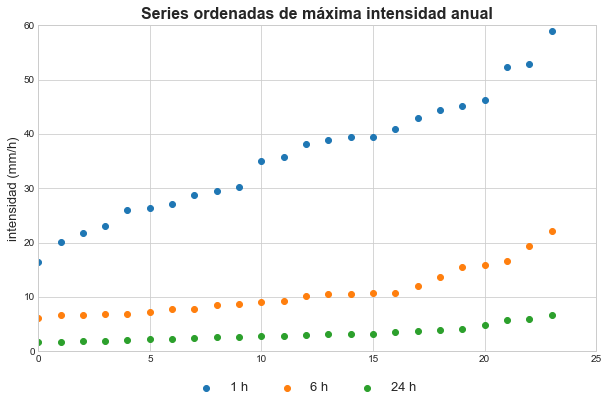

In [131]:
# Configurar el gráfico
fig = plt.figure(figsize=(10, 6))
plt.title('Series ordenadas de máxima intensidad anual', fontsize=16, weight='bold')
plt.xlabel('', fontsize=13)
plt.xlim((0, 25))
plt.ylabel('intensidad (mm/h)', fontsize=13)
plt.ylim((0, 60))

# Tres gráficos de dispersión para cada duración de tormenta
plt.scatter(range(intensity.shape[0]), intensity.sort_values(1)[1], label='1 h')
plt.scatter(range(intensity.shape[0]), intensity.sort_values(6)[6], label='6 h')
plt.scatter(range(intensity.shape[0]), intensity.sort_values(24)[24], label='24 h')

# Leyenda
fig.legend(loc=8, ncol= 3, fontsize=13);

### Ajuste de la función GEV a los datos

Hemos de ajustar una distribución estadística de extremos a los datos. A partir de este ajuste podremos calcular los periodos de retorno. Utilizaremos la función de distribución **GEV (generalized extreme values)**. La función de distribución GEV sigue, para el caso de variables siempre positivas como la precipitación, la siguiente ecuación:

$$F(s,\xi)=e^{-(1+\xi s)^{-1/\xi}}  \quad \forall \xi>0$$
$$ s = \frac{x-\mu}{\sigma} \quad \sigma>0$$

Donde $s$ es la variable de estudio estandarizada a través del parámetro de posición $\mu$ y el parámetro de escala $\sigma$, y $\xi$ es el parámetro de forma. Por tanto, la distribución GEV tiene 3 parámetros. En la siguiente figura se muestra la función de densidad y la función de distribución de extremos del tipo II, la distribución de Frechet, para diversos valores de los parámetros de escala y forma.

<img src="Frechet.png" alt="Mountain View" style="width:600px">

Para ajustar la función GEV utilizaremos la función `genextreme.fit` del paquete `SciPy.stats` de Python. Esta función devuelve los valores de los 3 parámetros de la GEV (forma, localización y escala) que mejor se ajustan a nuestros datos.

In [132]:
# Ejemplo
# Ajustar la GEV para duración 1 h
par_int1h = genextreme.fit(intensity[1])

In [133]:
print('Parámetros ajustados para la intensidad en 1 h:')
print('xi =', round(par_int1h[0], 4))
print('mu =', round(par_int1h[1], 4))
print('sigma =', round(par_int1h[2], 4))

Parámetros ajustados para la intensidad en 1 h:
xi = 0.2339
mu = 31.7407
sigma = 10.3977


Lo haremos con un bucle para las tres duraciones (1, 6 y 24 h). Los parámetros se guardarán en el data frame *parametros*.

In [139]:
# Ajustar los parámetros de las 3 duraciones
parametros = pd.DataFrame(index=['xi', 'mu', 'sigma'], columns=D)
for duracion in D:
    # Ajustar la GEV y guardar los parámetros
    parametros[duracion] = genextreme.fit(intensity[duracion])
parametros

,1,6,24
xi,0.233923,-0.396873,-0.235411
mu,31.740658,8.404498,2.540506
sigma,10.397701,2.320138,0.836714


### Curva IDF empírica

La **probabilidad de no excedencia** (el valor de la función de distribución) y el **periodo de retorno** de una variable estan relacionados mediante la siguiente ecuación:

\\[R = \frac{1}{1-CDF(x)}\\]

Donde $R$ es el periodo de retorno en años, y $CDF(x)$ (del inglés, cumulative density function) es el valor de la función de distribución (o probabilidad de no excendencia)  del valor de precipitación $x$.

A partir de esta expresión se pueden calcular los **cuantiles** de un **periodo de retorno** dado:

\\[CDF(x) = \frac{R-1}{R} = 1 - \frac{1}{R}\\]

Analizaremos los periodos de retorno de 10, 25, 50 y 100 años. Calculamos los cuantiles ($Q$) correspondientes a estos periodos de retorno de acuerdo a las distribuciones anteriormente ajustadas.

In [140]:
# Periodos de retorno
R = np.array([10, 25, 50, 100], dtype="float64")

In [141]:
# Probabilidad de no excedencia
Q = 1. - 1. / R

Como ejemplo, generamos los valores extremos de la intensidad de una tormenta de 1 h de duración para las probabilidades de no excedencia (Q). Para ello utilizamos la función `genextrem.ppf` (*percent point function*) del paquete `SciPy.stats`.

In [142]:
# intensidad de 1 h para los periodos de retorno
P1 = genextreme.ppf(Q, *par[1]) # ppf: percent point function

print('Intensidad de precipitación en 1 h según periodo de retorno:')
for i, Tr in enumerate(R):
     print('I(Tr=', int(Tr), ') = ', round(P1[i], 1), ' mm/h', sep='')


Intensidad de precipitación en 1 h según periodo de retorno:
I(Tr=10) = 49.9 mm/h
I(Tr=25) = 55.2 mm/h
I(Tr=50) = 58.3 mm/h
I(Tr=100) = 61.0 mm/h


Podemos iterar el cálculo de extremos para cada una de las duraciones y cuantiles, guardando los datos en un *data frame* al que llamaremos *IDF*, el cual podemos graficar.

In [143]:
# data frame con los valores de la curva IDF
IDF = pd.DataFrame(index=R, columns=D)
for duracion in D:
    IDF[duracion] = genextreme(*parametros[duracion]).ppf(Q)
IDF

,1,6,24
10.0,49.932830,16.838676,5.023257
25.0,55.155961,23.363122,6.533005
50.0,58.347192,30.062678,7.892088
100.0,61.035854,38.844762,9.483084


Gráfico de líneas que muestra, para cada periodo de retorno, la intensidad de precipitación en función de la duración de la tormenta. 

Sólo tenemos los datos para tres duraciones de tormenta, motivo por el que la curva es tan quebrada. Para solventar este problema habría que repetir el cálculo para más duraciones de tormenta, o aplicar las **curvas IDF analíticas**.

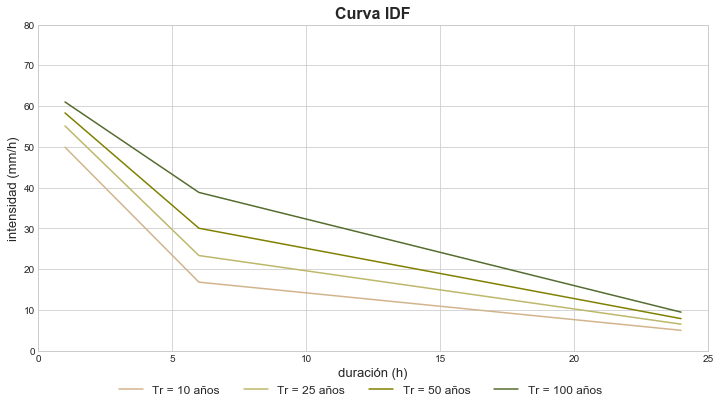

In [144]:
# configuración del gráfico
fig = plt.figure(figsize=(12, 6))
plt.title('Curva IDF', fontsize=16, weight='bold')
plt.xlabel('duración (h)', fontsize=13)
plt.xlim(0, IDF.columns.max() + 1)
plt.ylabel('intensidad (mm/h)', fontsize=13)
plt.ylim((0, 80))
color = ['tan', 'darkkhaki', 'olive', 'darkolivegreen']

for i, Tr in enumerate(IDF.index):
    plt.plot(IDF.loc[Tr,:], color=color[i], label='Tr = ' + str(int(Tr)) + ' años')

fig.legend(loc=8, ncol=4, fontsize=12);

### Curva IDF analítica
Hasta ahora hemos calculado una serie de puntos de la **curva IDF**, los correspondientes a las tormentas de 1, 6 y 24 h para los periodos de retorno de 10, 25, 50 y 100 años. Aplicando las ecuaciones analíticas de la curva IDF, podemos generar la curva completa.

Dos de las formas analíticas de la curva IDF son:

\\[I = \frac{a}{(D + c)^b}\\]

\\[I = \frac{a}{D ^b + c}\\]

donde \\(I\\) es la intensidad de preciptiación, \\(D\\) es la duración de la tormenta, \\(a\\) es una constante dependiente del periodo de retorno y \\(b\\) y \\(c\\) son constantes que dependen de la localización del estudio.

Asumiremos que la relación entre $a$ y el periodo de retorno sigue la siguiente función lineal:

\\[a = d \cdot R + e\\]

Crearemos funciones de Python para estas curvas analíticas.

In [145]:
def IDF_type_I(x, b, c, d, e):
    """Calcula la intensidad de la precipitación para un periodo de retorno y duración de la tormenta dadas a
    partir de la fórmula I = d * R + e / (D + c)**b.    
    
    Parámetros:
    -----------
    x:         list [2x1]. Par de valores de periodo de retorno(años) y duración (h)
    b:         float. Parámetro de la curva IDF
    c:         float. Parámetro de la curva IDF
    d:         float. Parámetro de la curva IDF
    e:         float. Parámetro de la curva IDF
    
    Salida:
    -------
    I:         float. Intensidad de precipitación (mm/h)"""
    
    a = d * x[0] + e
    I = a / (x[1] + c)**b
    return I

def IDF_type_II(x, b, c, d, e):
    """Calcula la intensidad de la precipitación para un periodo de retorno y duración de la tormenta dadas a
    partir de la fórmula I = d * R + e / (D**b + c).    
    
    Parámetros:
    -----------
    x:         list [2x1]. Par de valores de periodo de retorno(años) y duración (h)
    b:         float. Parámetro de la curva IDF
    c:         float. Parámetro de la curva IDF
    d:         float. Parámetro de la curva IDF
    e:         float. Parámetro de la curva IDF
    
    Salida:
    -------
    I:         float. Intensidad de precipitación (mm/h)"""
    
    a = d * x[0] + e
    I = a / (x[1]**b + c)
    return I

def IDF_type_III(x, b, c, d, e):
    """Calcula la intensidad de la precipitación para un periodo de retorno y duración de la tormenta dadas a
    partir de la fórmula I = d * R**e / (D + c)**b.    
    
    Parámetros:
    -----------
    x:         list [2x1]. Par de valores de periodo de retorno(años) y duración (h)
    b:         float. Parámetro de la curva IDF
    c:         float. Parámetro de la curva IDF
    d:         float. Parámetro de la curva IDF
    e:         float. Parámetro de la curva IDF
    
    Salida:
    -------
    I:         float. Intensidad de precipitación (mm/h)"""
    
    a = d * x[0]**e 
    I = a / (x[1] + c)**b
    return I

def IDF_type_IV(x, b, c, d, e):
    """Calcula la intensidad de la precipitación para un periodo de retorno y duración de la tormenta dadas a
    partir de la fórmula I = d * R**e / (D**b + c).    
    
    Parámetros:
    -----------
    x:         list [2x1]. Par de valores de periodo de retorno(años) y duración (h)
    b:         float. Parámetro de la curva IDF
    c:         float. Parámetro de la curva IDF
    d:         float. Parámetro de la curva IDF
    e:         float. Parámetro de la curva IDF
    
    Salida:
    -------
    I:         float. Intensidad de precipitación (mm/h)"""
    
    a = d * x[0]**e
    I = a / (x[1]**b + c)
    return I 

Para ajustar la curva hemos de crear primero una malla de pares de valores de periodo de retorno y duración. Utilizaremos las tres duraciones ('D') y los cuatro periodos de retorno ('R') ya empleados hasta ahora, para los cuales hemos calculado la intensidad de precipitación asociada (data frame 'IDF').

In [146]:
# malla con todas las posibles combinaciones de periodo de retorno 'R' y duración 'D'
(RR, DD) = np.meshgrid(R, D)
RR.shape, DD.shape

((3, 4), (3, 4))

In [147]:
# convertir 'RR' y 'DD' en un vector unidimensional
RR = RR.reshape(-1)
DD = DD.reshape(-1)
RR.shape, DD.shape

((12,), (12,))

In [148]:
# unir los vectores 'RR' y 'DD'
RD = np.vstack([RR, DD])

RD.shape

(2, 12)

In [149]:
# vector unidimensional a partir de 'IDF'
I = np.hstack([IDF[1], IDF[6], IDF[24]])

I.shape

(12,)

Para ajustar la curva utilizaremos la función `curve_fit` de `SciPy.optimize`. A esta función hemos de asignarle la función de la curva a ajustar, los valores de entrada (pares retorno-duración) y el valor de la función en esos pares (intensidad). La función devuelve un vector con los parámetros de la curva optimizados y otro vector con las covarianza entre dichos parámetros

In [150]:
# ajustar la curva
curva = IDF_type_IV
popt, pcov = curve_fit(curva, RD, I)

print('Parámetros optimizados de la curva IDF analítica')
for i, par in enumerate(['b', 'c', 'd', 'e']):
    print(par, '=', round(popt[i], 4))

Parámetros optimizados de la curva IDF analítica
b = 1.2978
c = 8.1883
d = 311.246
e = 0.1403


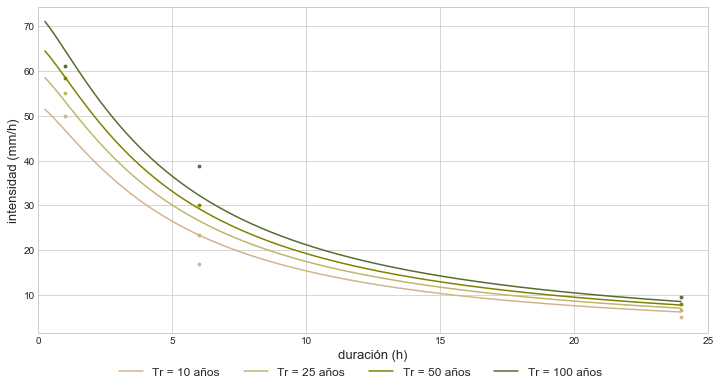

In [151]:
fig = plt.figure(figsize=(12, 6))
plt.xlim(0, D.max()+1)
plt.xlabel('duración (h)', fontsize=13)
plt.ylabel('intensidad (mm/h)', fontsize=13)
color = ['tan', 'darkkhaki', 'olive', 'darkolivegreen']

xx = np.linspace(.25, D.max(), 1000) # valores de duración
y = np.zeros((xx.size,)) # vector vacío de valores de intensidad

for i, Tr in enumerate(R): # para cada periodo de retorno
    for j, d in enumerate(xx): # para cada duración
        y[j] = curva((Tr, d), *popt)
    # gráfico de línea
    plt.plot(xx, y, color=color[i], label='Tr = ' + str(int(Tr)) + ' años')
    # gráfico de dispersión
    plt.scatter(D, IDF.loc[Tr], s=8, marker='o', c=color[i], label=None)

fig.legend(loc=8, ncol=4, fontsize=12);